from https://github.com/justmarkham/DAT8/blob/master/notebooks/13_advanced_model_evaluation.ipynb

In [1]:
# read the Titanic data
import pandas as pd
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/titanic.csv'
titanic = pd.read_csv(url, index_col='PassengerId')

In [2]:
# check for missing values
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [3]:
# drop rows with any missing values
titanic.dropna().shape

(183, 11)

In [4]:
# drop rows where Age is missing
titanic[titanic.Age.notnull()].shape

(714, 11)

In [5]:
# Imputation:  mean Age
titanic.Age.mean()

29.69911764705882

In [6]:
# Imputation: median Age
titanic.Age.median()

28.0

In [8]:
# Imputations: most frequent Age
titanic.Age.mode()

0    24
dtype: float64

In [9]:
# fill missing values for Age with the median age
titanic.Age.fillna(titanic.Age.median(), inplace=True)

Another strategy would be to build a KNN model just to impute missing values. How would we do that?
If values are missing from a categorical feature, we could treat the missing values as another category. Why might that make sense?
How do we choose between all of these strategies?

Part 2: Handling categorical features (Review)
How do we include a categorical feature in our model?
Ordered categories: transform them to sensible numeric values (example: small=1, medium=2, large=3)
Unordered categories: use dummy encoding (0/1)

Things to consider when deciding what to do wiht missing values:
missing at random
missing not at random


In [10]:
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,28,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S


In [11]:
# encode Sex_Female feature creating a new column. Female defined as 1
titanic['Sex_Female'] = titanic.Sex.map({'male':0, 'female':1})

In [12]:
# create a DataFrame of dummy variables
embarked_dummies = pd.get_dummies(titanic.Embarked, prefix='Embarked')
embarked_dummies.drop(embarked_dummies.columns[0], axis=1, inplace=True)

# concatenate the original DataFrame and the dummy DataFrame
titanic = pd.concat([titanic, embarked_dummies], axis=1)

In [13]:
titanic.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Female,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S,0,0,1


In [15]:
# define X and y
feature_cols = ['Pclass', 'Parch', 'Age', 'Sex_Female', 'Embarked_Q', 'Embarked_S']
X = titanic[feature_cols]
y = titanic.Survived

# train/test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# train a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

# make predictions for testing set
y_pred_class = logreg.predict(X_test)

# calculate testing accuracy
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred_class))

0.793721973094


AUC is very useful for imbalanced datasets, rather than classification accuracy.

Part 3: ROC curves and AUC

In [17]:
logreg.predict_proba(X_test)

array([[ 0.15500496,  0.84499504],
       [ 0.92547292,  0.07452708],
       [ 0.14910549,  0.85089451],
       [ 0.37482437,  0.62517563],
       [ 0.12320216,  0.87679784],
       [ 0.90388705,  0.09611295],
       [ 0.86385995,  0.13614005],
       [ 0.09867016,  0.90132984],
       [ 0.38897223,  0.61102777],
       [ 0.37482437,  0.62517563],
       [ 0.91682851,  0.08317149],
       [ 0.45040349,  0.54959651],
       [ 0.76515357,  0.23484643],
       [ 0.7914897 ,  0.2085103 ],
       [ 0.37482437,  0.62517563],
       [ 0.53711026,  0.46288974],
       [ 0.87875106,  0.12124894],
       [ 0.91375   ,  0.08625   ],
       [ 0.94463302,  0.05536698],
       [ 0.23160636,  0.76839364],
       [ 0.93571459,  0.06428541],
       [ 0.86287486,  0.13712514],
       [ 0.03735438,  0.96264562],
       [ 0.71846089,  0.28153911],
       [ 0.22165611,  0.77834389],
       [ 0.9226874 ,  0.0773126 ],
       [ 0.03946452,  0.96053548],
       [ 0.32105824,  0.67894176],
       [ 0.77807972,

In [16]:
# predict probability of survival
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

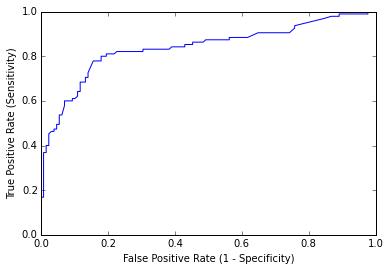

In [20]:
# plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)  #fpr false positive; tpr true positives
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [21]:
fpr  #or ask to see tpr or thresholds. Once decided on a fpr and tfr, print(threshold) to identify the point (I think)

array([ 0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.0078125,  0.0078125,  0.0078125,  0.0078125,
        0.0078125,  0.0078125,  0.0078125,  0.0078125,  0.0078125,
        0.0078125,  0.0078125,  0.0078125,  0.0078125,  0.0078125,
        0.0078125,  0.0078125,  0.0078125,  0.0078125,  0.0078125,
        0.015625 ,  0.015625 ,  0.015625 ,  0.0234375,  0.0234375,
        0.0234375,  0.0234375,  0.0234375,  0.03125  ,  0.0390625,
        0.0390625,  0.046875 ,  0.046875 ,  0.046875 ,  0.0546875,
        0.0546875,  0.0546875,  0.0546875,  0.0546875,  0.0625   ,
        0.0703125,  0.0703125,  0.0703125,  0.0859375,  0.09375  ,
        0.09375  ,  0.1015625,  0.109375 ,  0.109375 ,  0.109375 ,
        0.1171875,  0.1171875,  0.1171875,  0.1171875,  0.1171875,
        0.125    ,  0.1328125,  0.1328125,  0.1328125,  0.1406

In [22]:
# calculate AUC
print (metrics.roc_auc_score(y_test, y_pred_prob))

0.838692434211


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10f1617b8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10f1f0a20>], dtype=object)

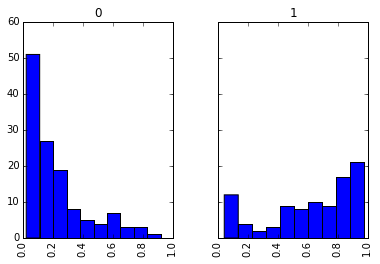

In [23]:
# histogram of predicted probabilities grouped by actual response value
df = pd.DataFrame({'probability':y_pred_prob, 'actual':y_test})
df.hist(column='probability', by='actual', sharex=True, sharey=True)